## Table of Contents

### 1. Import libraries and data
### 2. Data cleaning and wrangling
### 3. Decompose data components 
### 4. Conduct Dickey-Fuller test for stationarity
### 5. Conduct a round of differencing 
### 6. Conduct 2nd round of differencing 

### 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
#setting the path for data set import
path = r'/Users/davesmac/Desktop/Achievement 6'

In [26]:
df_searches = pd.read_csv(os.path.join(path, 'Data' , 'climbing_searches.csv'))

In [27]:
df_searches.head()

,Month,rock climbing: (United States)
0,2004-01,96
1,2004-02,89
2,2004-03,100
3,2004-04,90
4,2004-05,85


### 2. Data cleaning and wrangling

In [28]:
# Rename columns
df_searches= df_searches.rename(columns = {'rock climbing: (United States)' : 'Searches'})

In [29]:
df_searches.head()

,Month,Searches
0,2004-01,96
1,2004-02,89
2,2004-03,100
3,2004-04,90
4,2004-05,85


In [30]:
# Set the "Date" column as the index

from datetime import datetime

df_searches['datetime'] = pd.to_datetime(df_searches['Month']) # Create a datetime column from "Date.""
df_searches = df_searches.set_index('datetime') # Set the datetime as the index of the dataframe.
df_searches.drop(['Month'], axis=1, inplace=True) # Drop the "Date" column.
df_searches.head()

,Searches
datetime,
2004-01-01,96
2004-02-01,89
2004-03-01,100
2004-04-01,90
2004-05-01,85


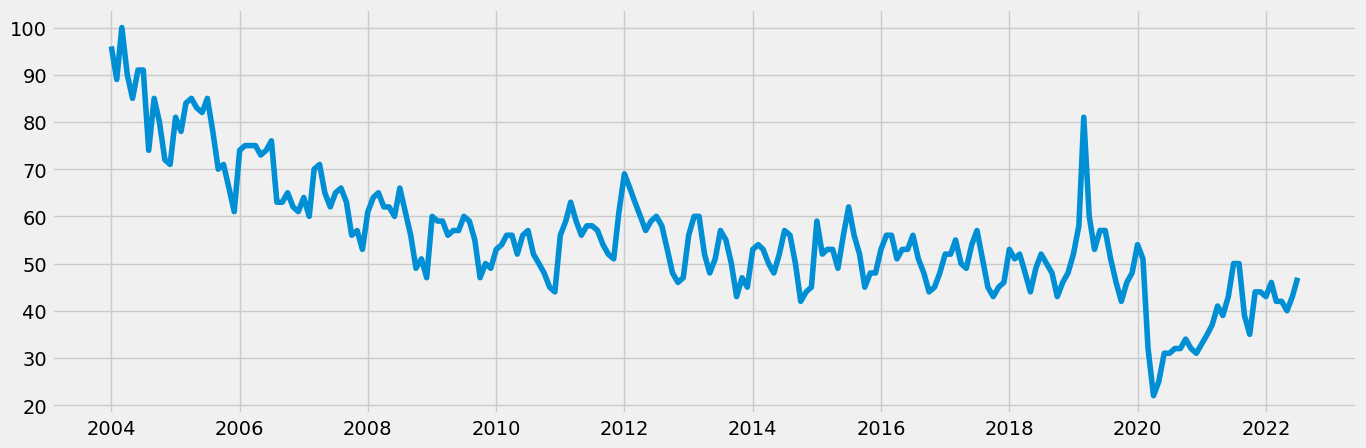

In [31]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_searches)

### 3. Decompose data components 

In [32]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_searches, model='additive')

In [33]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

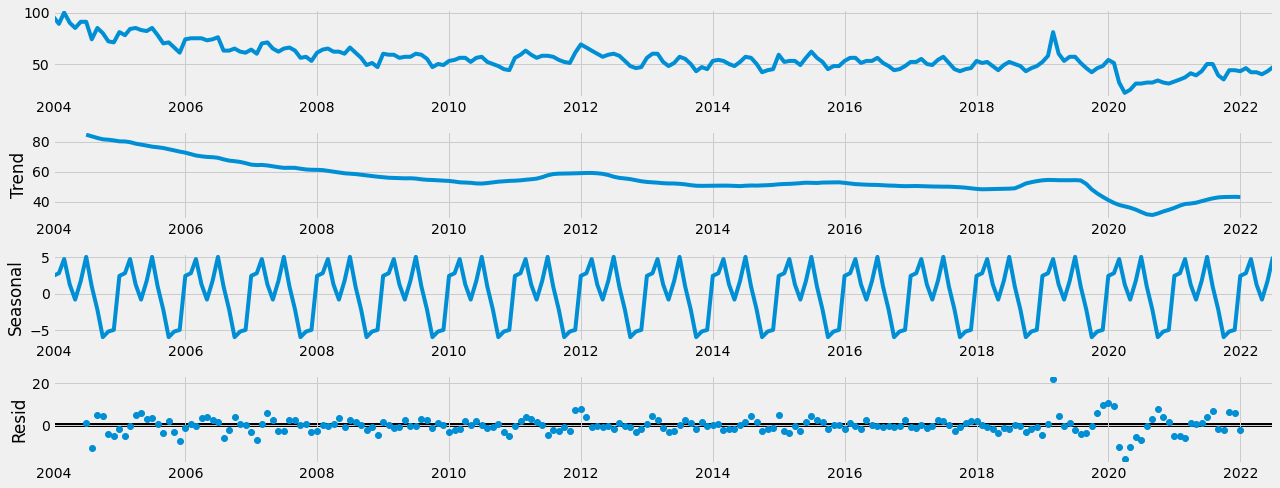

In [34]:
# Plot the separate components

decomposition.plot()
plt.show()

#### From the results of my decomposition of the data, I see that google searches for rock climbing have had a trend of gradually declining since 2004. There was a brief rise in 2019, followed by another decline into 2020.  However, searches have been on a gradual rise since 2021 though. 

#### I am also seeing a clear pattern of seasonality throughout the years. Searches seem to hit a high in the beginning of the year, followed by a drop a few months in. There is then another rise before a very sharp drop towards the end of the year.  This is a very interesting pattern to me, because I can't think of any concrete explanation for this pattern.  

#### There doesn't seem to be a lot of noise/residual in the data. However, there are a number of deviations around 2020/2021.  I would hypothesize that this is related to the COVID-19 pandemic.  


### 4. Conduct Dickey-Fuller test for stationarity

In [36]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_searches['Searches'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.220928
p-value                          0.198738
Number of Lags Used             12.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


#### Looking at the results of the Stationarity test, I first see that my test statistic is larger than my critical value. This means that I cannot reject the null hypothesis and my data is non-stationary. 

#### Next I see that my p-value is greater than .05, meaning that my test result is not significant. 

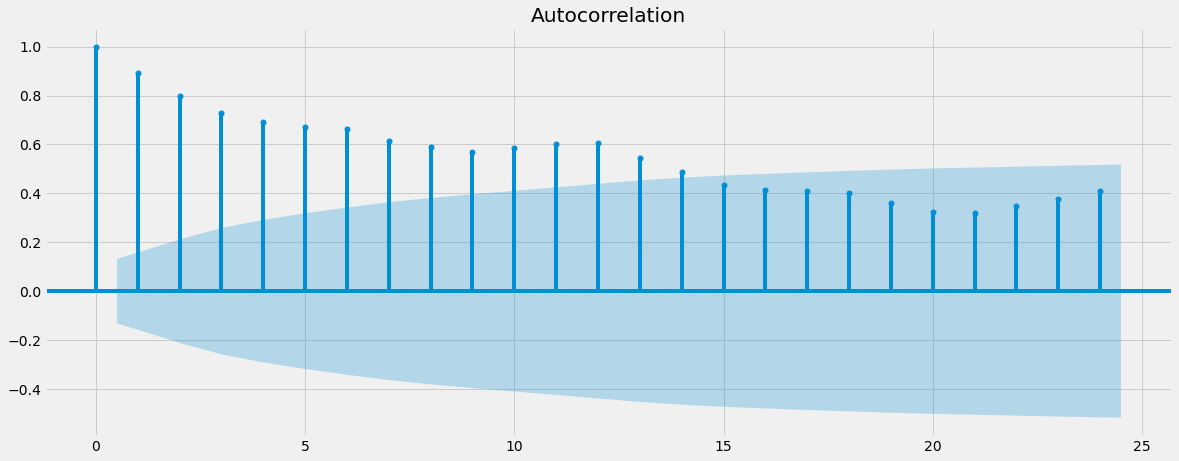

In [37]:
# plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_searches)
plt.show()

### 5. Conduct a round of differencing 

In [38]:
data_diff = df_searches - df_searches.shift(1)

In [39]:
#remove missing values
data_diff.dropna(inplace = True)

In [40]:
data_diff.head()

,Searches
datetime,
2004-02-01,-7.0
2004-03-01,11.0
2004-04-01,-10.0
2004-05-01,-5.0
2004-06-01,6.0


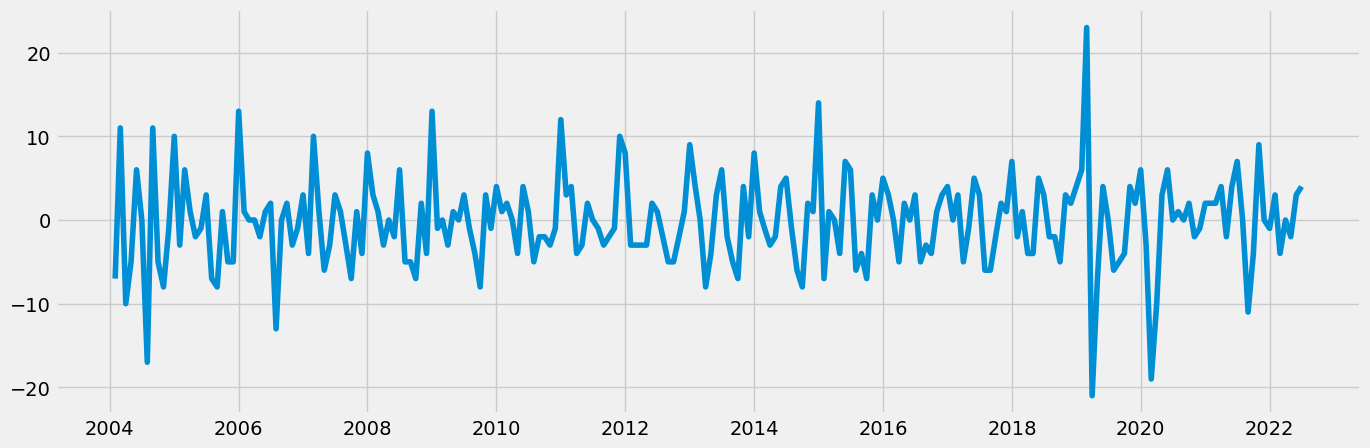

In [41]:
# data diff time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [42]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -5.003499
p-value                          0.000022
Number of Lags Used             11.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


#### After a round of data differencing, I see that my test statistic is now smaller than my critical value, meaning that my data is stationary.  I also have a p-value of less than .05, meaning my test result is considered significant. 

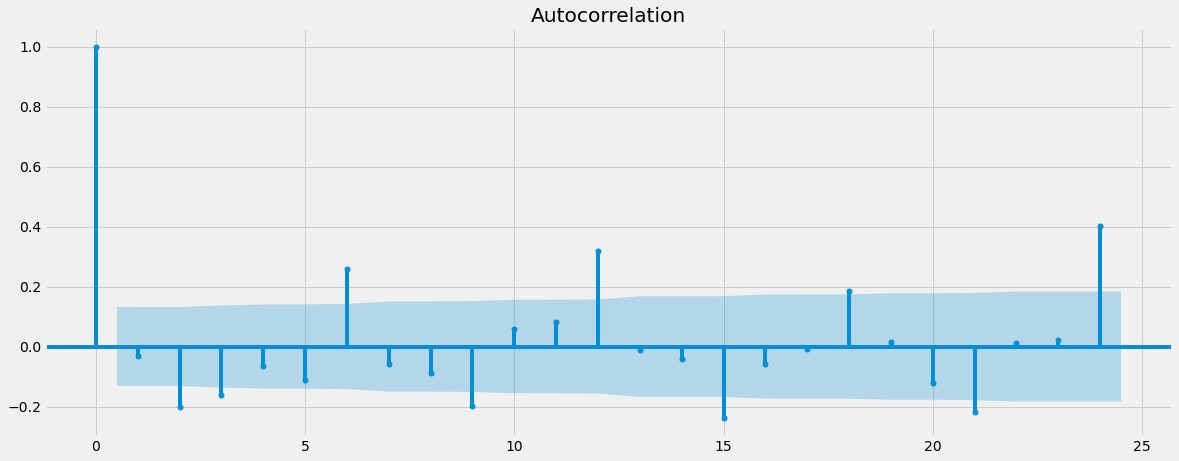

In [43]:
plot_acf(data_diff)
plt.show()

#### Despite the Dickey Fuller test showing my data is stationary and the autocorrelation plot improving, this plot is showing a weak stationarity. Because I have 10 significant lags, it would probably be best to run a second round of differencing. 

### 6. Conduct 2nd round of differencing 

In [45]:
#2nd round data differencing
data_diff_2 = data_diff - data_diff.shift(1)

In [48]:
data_diff_2.dropna(inplace = True)

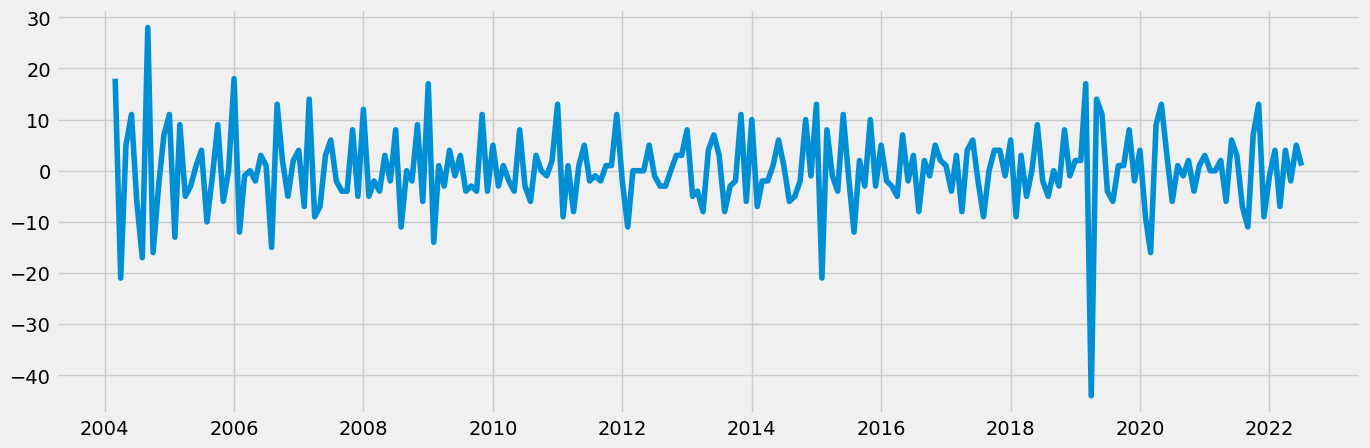

In [49]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [50]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -9.987406e+00
p-value                        2.038157e-17
Number of Lags Used            1.200000e+01
Number of Observations Used    2.080000e+02
Critical Value (1%)           -3.462186e+00
Critical Value (5%)           -2.875538e+00
Critical Value (10%)          -2.574231e+00
dtype: float64


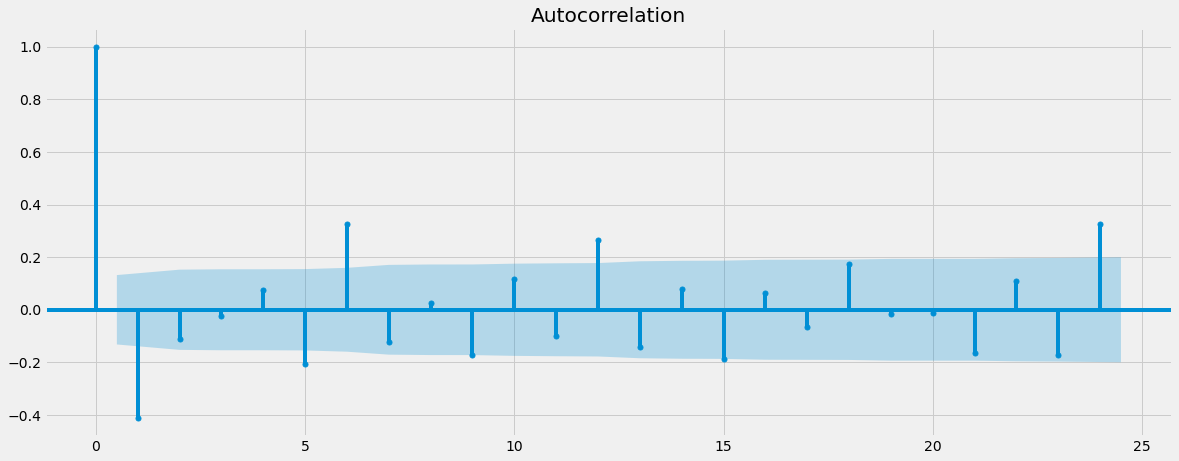

In [51]:
plot_acf(data_diff_2)
plt.show()

#### After the second round of data differencing, from the results of the dickey fuller test and the autocorrelation plot, my data is stationary and has less significant lags, meaning a stronger stationarity. A third round of differencing is not needed. 